# Import Packages and Reading of Data

In [104]:
import time
import warnings
import pickle
import shap

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, RepeatedKFold
from xgboost import plot_importance
from bayes_opt import BayesianOptimization
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")

In [105]:
# Reading of Excel
train_metadata = pd.read_csv('train_dataset_robustness_check.csv')
test_metadata = pd.read_csv('test_dataset_robustness_check.csv')

In [106]:
print(test_metadata[["isBot"]].value_counts())
train_metadata

isBot
0        199
1        118
dtype: int64


,protected,verified,location,followers_count,following_count,tweet_count,listed_count,has_profile_image,un_no_of_char,un_special_char,name_no_of_char,name_special_char,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description,has_url,isBot
0,1,0,1,-0.194129,-0.248605,-0.380875,-0.203500,1,-0.286861,1,-1.809819,0,-0.303222,0.420027,0,1,0,0
1,1,0,0,-0.194237,-0.246778,-0.419793,-0.230386,1,-2.129929,0,0.449779,0,-0.303222,-0.312995,1,1,0,1
2,0,0,1,-0.194725,-0.248491,-0.420703,-0.230386,1,-1.392702,0,-0.002140,0,-0.303222,-0.312995,1,1,0,1
3,0,0,1,-0.184398,-0.055316,-0.303895,-0.199659,1,-1.024088,0,-1.056619,0,-0.303222,0.420027,0,1,0,0
4,0,0,0,-0.192503,-0.231127,-0.394460,-0.226545,1,0.450366,0,-1.508539,0,0.912545,-0.312995,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,0,0,1,-0.170140,-0.177664,-0.327602,-0.099798,1,-0.286861,1,-0.152780,0,0.912545,-0.312995,0,1,1,0
1263,0,0,1,-0.191174,-0.212164,-0.208225,-0.195818,1,0.450366,0,2.106818,0,-0.303222,-0.312995,0,1,0,0
1264,0,0,0,-0.194915,-0.274651,-0.420300,-0.230386,1,-1.392702,1,0.751059,0,-0.303222,-0.312995,1,1,0,1
1265,0,0,0,-0.194617,-0.274651,-0.379214,-0.230386,1,1.556207,1,0.148500,0,-0.303222,-0.312995,1,1,0,1


In [107]:
test_metadata

,protected,verified,location,followers_count,following_count,tweet_count,listed_count,has_profile_image,un_no_of_char,un_special_char,name_no_of_char,name_special_char,des_no_of_usertags,des_no_of_hashtags,des_external_links,has_description,has_url,isBot
0,0,0,0,-0.194779,-0.274651,-0.420668,-0.226545,1,-0.655475,0,-0.002140,0,-0.303222,-0.312995,1,1,0,1
1,1,0,0,-0.188464,-0.238667,-0.361136,-0.222704,1,1.187593,0,0.299140,0,-0.303222,-0.312995,0,1,0,0
2,0,0,1,-0.194129,-0.270196,-0.419549,-0.230386,1,0.450366,0,-1.357899,0,-0.303222,-0.312995,0,1,0,0
3,0,0,1,-0.194861,-0.263799,-0.420440,-0.226545,1,-1.024088,0,-0.755339,0,-0.303222,-0.312995,0,1,0,1
4,0,0,1,-0.033850,0.466862,-0.008859,1.436532,1,-1.761316,0,-0.454060,0,3.344080,3.352112,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,0,0,1,-0.194698,-0.274309,-0.421017,-0.230386,1,-0.655475,0,-0.152780,0,-0.303222,-0.312995,0,0,1,1
313,0,0,1,-0.181253,-0.233298,0.473950,-0.218863,1,1.556207,0,0.299140,0,-0.303222,4.085134,0,1,0,0
314,0,0,1,-0.044178,-0.001853,0.243726,0.119129,1,-1.024088,0,2.106818,1,0.912545,1.886069,0,1,1,0
315,0,0,1,-0.179573,0.138887,-0.091312,-0.168933,1,0.081753,0,0.600419,0,-0.303222,0.420027,0,1,1,0


In [108]:
x_train = train_metadata.drop(columns = "isBot")
x_test = test_metadata.drop(columns = "isBot")
y_train = train_metadata["isBot"]
y_test = test_metadata["isBot"]

# Robustness Check
The XGBoost Classifier is chosen as the best model as it recorded the highest F1 score.

To ensure our XGBoost model is robust, we further evaluated the final model on a new dataset. 

In [109]:
weight_train = y_train.value_counts()[0] / y_train.value_counts()[1]

In [110]:
# Model (optimal hyperparameters selected by grid search; refer to XGBoost.ipynb for more details)
params_xgb = {'colsample_bytree': 0.7, 'eta': 0.1, 'max_depth': 25, 'subsample': 0.8}
xgb_classifier = XGBClassifier(gamma = 0.1,
                               alpha = 0.5,
                               max_depth = int(params_xgb['max_depth']), 
                               eta = params_xgb['eta'], 
                               subsample = params_xgb['subsample'],
                               colsample_bytree = params_xgb['colsample_bytree'],
                               scale_pos_weight = weight_train,
                               objective = "binary:logistic",
                               eval_metric = "logloss")

In [111]:
%%time

# Fit Model
xgb_model = xgb_classifier.fit(x_train, y_train)

CPU times: user 559 ms, sys: 25.9 ms, total: 585 ms
Wall time: 212 ms


In [112]:
%%time

# y_prediction for the best model
y_pred = xgb_model.predict(x_test)

CPU times: user 12 ms, sys: 3.67 ms, total: 15.7 ms
Wall time: 18.2 ms


In [113]:
# Metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
lg_loss = metrics.log_loss(y_test, y_pred)
print(f'Log Loss: {lg_loss}')
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(f'ROC AUC: {roc_auc}')
f1_score = metrics.f1_score(y_test, y_pred)
print(f'F1-score: {f1_score}')
precision = metrics.precision_score(y_test, y_pred)
print(f'Precision: {precision}')
recall = metrics.recall_score(y_test, y_pred)
print(f'Recall: {recall}')
report = metrics.classification_report(y_test, y_pred)
print(f'Classification Report: \n {report}')

Accuracy: 0.9274447949526814
Log Loss: 2.6151546623018755
ROC AUC: 0.9197896260965845
F1-score: 0.9012875536480687
Precision: 0.9130434782608695
Recall: 0.8898305084745762
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       199
           1       0.91      0.89      0.90       118

    accuracy                           0.93       317
   macro avg       0.92      0.92      0.92       317
weighted avg       0.93      0.93      0.93       317



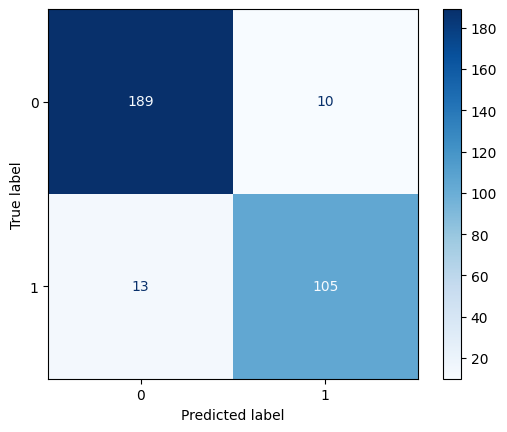

In [114]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = "Blues")
plt.show()

## Feature Importance

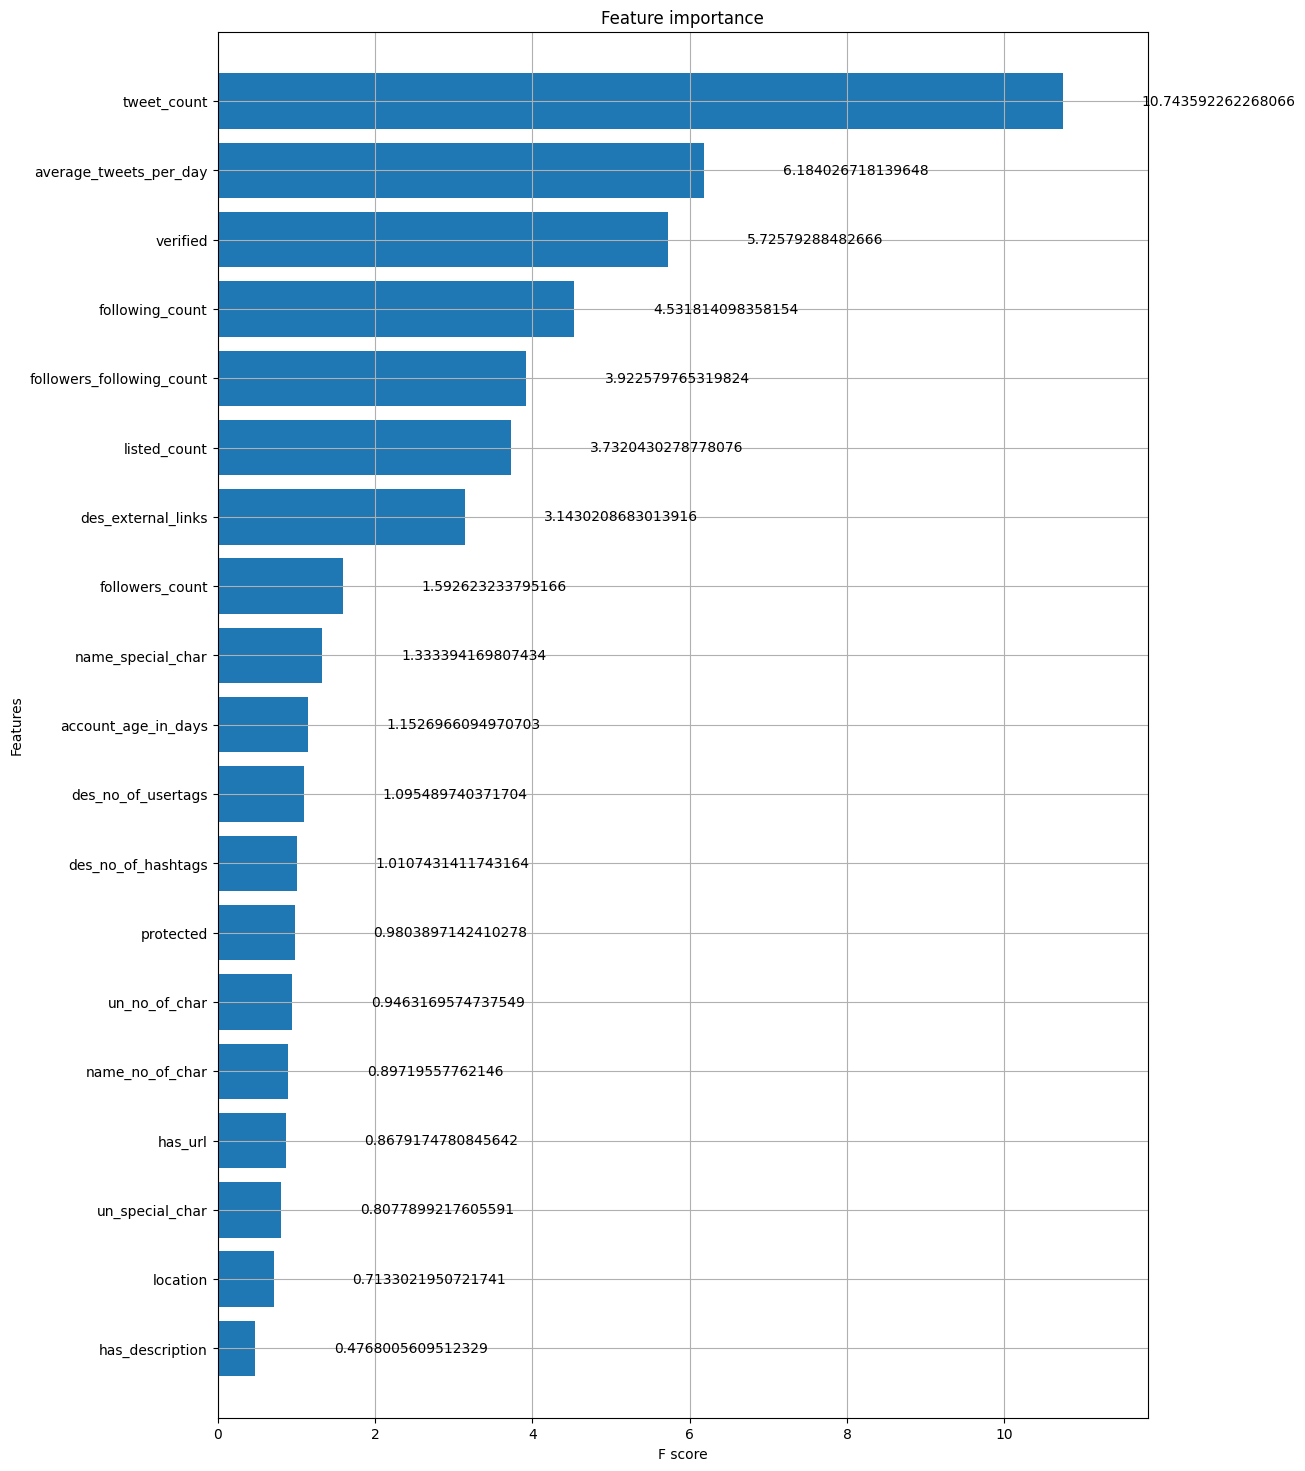

In [97]:
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(xgb_model, importance_type = 'gain', height=0.8, ax=ax)
plt.show()

In [101]:
# Local Level
shap.initjs()
explainer = shap.Explainer(xgb_model.predict_proba, x_train)
shap_values = explainer(x_test.iloc[[25]])
shap_values = shap_values[...,1]
shap.plots.force(shap_values)

In [102]:
xgb_model.predict_proba(x_test.iloc[[25]])

array([[0.9785876 , 0.02141237]], dtype=float32)

Permutation explainer: 318it [00:24,  8.10it/s]                                 


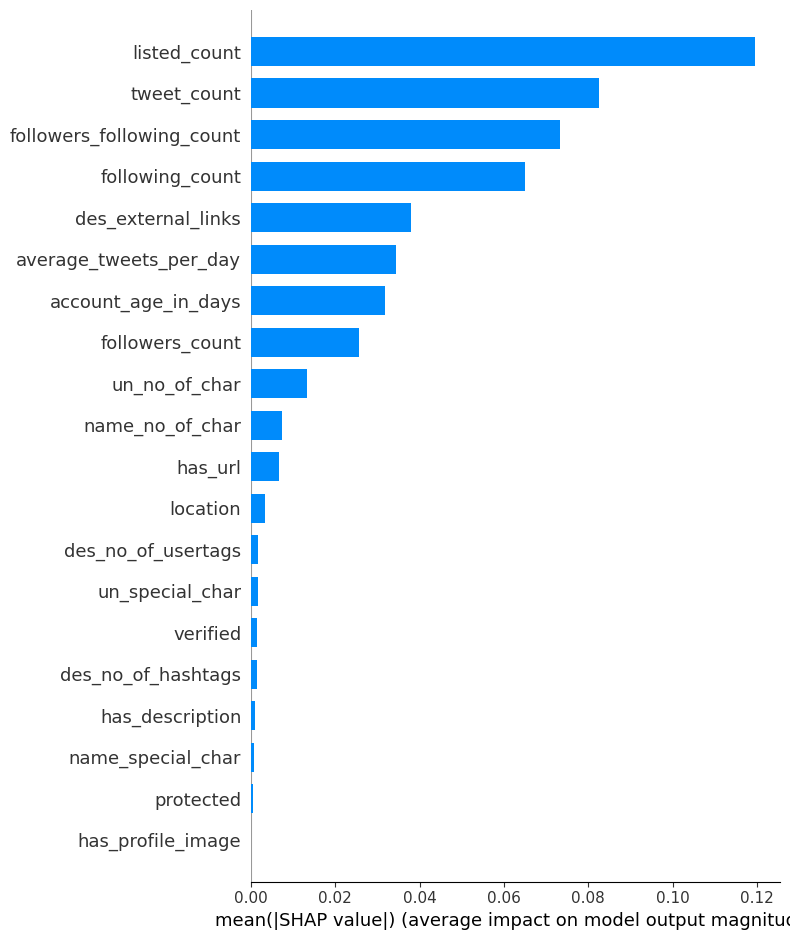

In [103]:
# Global Level
shap_values_global = explainer(x_test)
shap_values_global = shap_values_global[...,1]
shap.summary_plot(shap_values_global, feature_names = x_test.columns, plot_type = "bar", sort = True)